<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/%5BAssignment_DataViz_3%5D_Applied_Data_Science_with_Python_Specialization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least two datasets** on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

## **1. Region and Domain**
**State the region and the domain category that your data set are about**<p>

*   England, Germany and Spain
*   National soccer league data historical results. Sports/Athletics

## **2. Research Question**
**You must state a question about the domain category and region that you identified as being interesting**<p>
It's said throughout soccer that Premiere League (ENG) is the more balanced league among the most important soccer leagues. The objective is to evaluate the Premier League, La Liga (Spain), and Bundesliga (Germany) to see if that assumption is correct looking only at the surface of the results.

## **3. Links**
**You must provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.**<p>

The webpage bdfutbol contains historical data about multiple european leagues. I selected for this study the german, english and spanish leagues. To extract the information I used some web scrapping.

*   https://www.bdfutbol.com/t/t.html?cat=ger
*   https://www.bdfutbol.com/en/t/t.html?cat=eng
*   https://www.bdfutbol.com/en/t/t.html?cat=1a


### Some Context to the study

The Premier League was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888. Considering this important information, I will drop from the study any results previously 1992 so we can have our dataframe with the same historical data.<p>

I will also exclude the current season 2022-23 as this season didn't finish yet. In this way, our study will consist of data from the National Spanish, England, and German leagues from 1992 to 2022. 30 years of data.

### DataImport and Pre-Processing

#### Bundesliga

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random
import time
from time import sleep
from random import randint
import re

The `requests.get()` method is used to send a GET request to the specified URL and `.content` is used to retrieve the content of the response as bytes. The content is then passed to the `BeautifulSoup` class to parse the HTML and create a `BeautifulSoup object`, which can be used to extract information from the HTML using various methods, such as `find_all` in this case.<p>

The code is finding all the HTML elements with the class `item_temporada` and printing the value of the `href` attribute of the a tag within those elements. The result of the function would be a list of URLs contained within the a tags in the HTML.<p>

After finding the HTML elements, it will return a list of the URLs contained within the a tags in the HTML and store the result in the `list seasons_bundesliga`. You can then use the seasons list for further processing or manipulation.<p>

After pre-processing this, I found useful to add a regex function to get the URLs following a specific pattern. The pattern for bundesliga is using `tgerYYYY-YY.html` so the `re.match` function is used to check if the string (the URL) starts with the specified pattern `"^tger"`. If it does, the URL is added to the list seasons.

In [ ]:
def scrape():
    url_bundesliga = 'https://www.bdfutbol.com/t/t.html?cat=ger'
    response = requests.get(url_bundesliga).content
    soup = BeautifulSoup(response, 'html.parser')
    areas = soup.find_all('div', class_='item_temporada ')

#use this function and store the values in a list called season
    seasons_bundesliga = []
    for area in areas:
        season = area.find('a').attrs['href']
       #using regex to get only values starting with 'tger'
        if re.match(r"^tger", season):
            seasons_bundesliga.append(season)
    return seasons_bundesliga

seasons_bundesliga = scrape()
print(seasons_bundesliga)

['tger2022-23.html', 'tger2021-22.html', 'tger2020-21.html', 'tger2019-20.html', 'tger2018-19.html', 'tger2017-18.html', 'tger2016-17.html', 'tger2015-16.html', 'tger2014-15.html', 'tger2013-14.html', 'tger2012-13.html', 'tger2011-12.html', 'tger2010-11.html', 'tger2009-10.html', 'tger2008-09.html', 'tger2007-08.html', 'tger2006-07.html', 'tger2005-06.html', 'tger2004-05.html', 'tger2003-04.html', 'tger2002-03.html', 'tger2001-02.html', 'tger2000-01.html', 'tger1999-00.html', 'tger1998-99.html', 'tger1997-98.html', 'tger1996-97.html', 'tger1995-96.html', 'tger1994-95.html', 'tger1993-94.html', 'tger1992-93.html', 'tger1991-92.html', 'tger1990-91.html', 'tger1989-90.html', 'tger1988-89.html', 'tger1987-88.html', 'tger1986-87.html', 'tger1985-86.html', 'tger1984-85.html', 'tger1983-84.html', 'tger1982-83.html', 'tger1981-82.html', 'tger1980-81.html', 'tger1979-80.html', 'tger1978-79.html', 'tger1977-78.html', 'tger1976-77.html', 'tger1975-76.html', 'tger1974-75.html', 'tger1973-74.html',

A `for loop` is used to iterate over the values in the `seasons_bundesliga` list. For each iteration of the loop, the same process is performed:

*   sending a GET request (`requests.get` method to send a GET request to the URL `main_url` + `seasons_bundesliga`) - where  each value in the seasons list is used
*   parsing the HTML content - The `BeautifulSoup` class is then used to parse the HTML content of the page variable and create a BeautifulSoup object, `soup`. The `'lxml'` argument is passed to specify the parser to use.
*   finding the table element - The `soup.find` method is used to find the first HTML element with the `id` attribute equal to `'classific'`. This element is stored in the `table` variable.
*   extracting the header - A `for loop` is used to extract the text content of all the `th` elements within the table element and append it to the list `headers`. The headers list is used to specify the columns of the pandas dataframe, `df`.
*   extracting row data - A `second for loop` is used to extract the text content of all the `td` elements within the table element, create a `list row` with the extracted text, and append the row list as a new row in the `df` dataframe. The `.loc` method is used to add a new row to the dataframe by specifying the index and the values of the row.
*   creating a new dataframe `df`
*   A new column called 'season' is added to the `df` dataframe with a the value corresponding to the `seasons_bundesliga`. The regular expression r'(\d{4})-(\d{2})' is used to extract information from the season string. The `re.search` function is used to search for a match to this pattern in each season string. The matched groups are then extracted and concatenated to form the desired format, YYYY-YY. The result is then assigned to the season column in the data frame.

After each iteration of the loop, the newly created dataframe `df` is appended to the `bundesliga dataframe` using the `append method`. The ignore_index argument is set to True to reset the index of the newly appended dataframe.<p>

A `random sleep timer` has been added after each iteration of the loop. The `random.uniform` function is used to generate a `random float` between 1 and 3. This float is then passed as an argument to the `time.sleep` function, causing the program to wait for that many seconds before making the next request. This will introduce a delay between requests, which can help prevent overloading the website with too many requests in a short period of time.<p>

This loop will repeat the process for each season in the `seasons_bundesliga list` and append the results to the `bundesliga dataframe`. The final result will be a dataframe containing the information for all the seasons in the seasons list.

In [ ]:
# Create a dataframe for bundesliga
main_url = 'https://www.bdfutbol.com/t/'
bundesliga = pd.DataFrame()

#creating a loop to append to use the values in the list seasons to concatenate with main_url

for season in seasons_bundesliga:
    page = requests.get(main_url + season)
    #parser-lxml = Change html to Python friendly format
    soup = BeautifulSoup(page.text, 'lxml')
    #Obtain information from tag <table>
    table = soup.find('table', id='classific')
    headers = []
    # Obtain every title of columns with tag <th>
    for i in table.find_all('th'):
        title = i.text
        headers.append(title)
    df = pd.DataFrame(columns=headers)
    # Create a for loop to fill table data
    for j in table.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [i.text for i in row_data]
        length = len(df)
        df.loc[length] = row
    #creating a new column using the season information, using regex to change the list values
    df['season'] = re.search(r'(\d{4})-(\d{2})', season).group(1) + '-' + re.search(r'(\d{4})-(\d{2})', season).group(2)
    bundesliga = bundesliga.append(df, ignore_index=True)

    # Add a random sleep timer
    sleep_time = random.uniform(1, 3)
    time.sleep(sleep_time)

bundesliga.head()

,,,,,Pts.,PJ,PG,PE,PP,GF,GC,TG,TV,season
0,,1,,Bayern München,43,20,12,7,1,59,18,31,2,2022-23
1,,2,,Union Berlin,42,20,13,3,4,35,24,35,1,2022-23
2,,3,,Borussia Dortmund,40,20,13,1,6,40,26,43,0,2022-23
3,,4,,Freiburg,37,20,11,4,5,32,31,37,1,2022-23
4,,5,,RB Leipzig,36,20,10,6,4,40,26,35,1,2022-23


In [ ]:
bundesliga.tail()

,,,,,Pts.,PJ,PG,PE,PP,GF,GC,TG,TV,season
1073,,12,,Kaiserslautern,26,30,10,6,14,48,69,0,2,1963-64
1074,,13,,Karlsruher,24,30,8,8,14,42,55,0,0,1963-64
1075,,14,,Hertha Berliner,24,30,9,6,15,45,65,0,1,1963-64
1076,,15,,Münster,23,30,7,9,14,34,52,0,0,1963-64
1077,,16,,Saarbrücken,17,30,6,5,19,44,72,0,1,1963-64


In [ ]:
#analysing our data
bundesliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0           1078 non-null   object
 1           1078 non-null   object
 2           1078 non-null   object
 3           1078 non-null   object
 4   Pts.    1078 non-null   object
 5   PJ      1078 non-null   object
 6   PG      1078 non-null   object
 7   PE      1078 non-null   object
 8   PP      1078 non-null   object
 9   GF      1078 non-null   object
 10  GC      1078 non-null   object
 11  TG      1078 non-null   object
 12  TV      1078 non-null   object
 13  season  1078 non-null   object
dtypes: object(14)
memory usage: 118.0+ KB


In [ ]:
#This scrapping method usign time_sleep is required but took time as we are looking at a large number of pages
#so, first of all, let's copy the dataframe before changing anything to avoid wasting time scrapping again if we do anything wrong.

bdl = bundesliga.copy()

In [ ]:
# we have 4 columns without names, lets give names to them
cols = []
count = 1
for column in df.columns:
    if column == '': #column with no name
        cols.append(f'_{count}')
        count+=1
        continue
    cols.append(column)
bdl.columns = cols

#We want to rename some columns and drop the blank columns
#the dataframe is using the spanish names, I will change to english and I will use the full name too

#renaming the columns
bdl = bdl.rename(
    columns = {
        '_2':'Position',
        '_4':'Team',
        'Pts.':'Points',
        'PJ':'Matches_Played',
        'PG':'Win',
        'PE':'Draw',
        'PP':'Lose',
        'GF':'Goals_For',
        'GC':'Goals_Against',
        'TG':'Yellow_Cards',
        'TV':'Red_Cards',
        'season':'Season'})

#let's drop the blank columns
bdl.drop(['_1','_3'], axis=1, inplace=True)

bdl.head()

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season
0,1,Bayern München,43,20,12,7,1,59,18,31,2,2022-23
1,2,Union Berlin,42,20,13,3,4,35,24,35,1,2022-23
2,3,Borussia Dortmund,40,20,13,1,6,40,26,43,0,2022-23
3,4,Freiburg,37,20,11,4,5,32,31,37,1,2022-23
4,5,RB Leipzig,36,20,10,6,4,40,26,35,1,2022-23


In [ ]:
#now, let's change the column format to integer. All the columns will change, the only ones we gonna keep as object (for now) are Season and Team

#defining the columns
cols_to_convert = ['Points','Matches_Played','Win','Draw','Lose','Goals_For','Goals_Against','Yellow_Cards','Red_Cards']

#changing to numeric

bdl[cols_to_convert] = bdl[cols_to_convert].apply(pd.to_numeric)

bdl.info()

ValueError: ignored

Yeah, great, let's keep this error here. It seems that we have some * regarding the points. This is normal when something happens before, during or sometimes after the end of the season due some punishment or anything like that.<p>

Let's take a look just in this specific case.

In [ ]:
#let's return this specific row just so see what's about, and discover the team and the season.

error_row = bdl.loc[bdl['Points'] == '36*']

error_row

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season
356,15,Kaiserslautern,36*,34,11,6,17,39,62,94,7,2003-04


Doing a research I found that in this particular season the** Kaiserslautern had lost three points for financial irregularities.** <p>

There are lot of different reasons that something like that can happen with a team, so now, let's clean the columns to keep only numbers as in this study there's no point to evaluate each case.

In [ ]:
bdl.Points.unique()

array(['43', '42', '40', '37', '36', '35', '30', '27', '26', '21', '19',
       '17', '16', '12', '77', '69', '64', '58', '57', '55', '52', '46',
       '45', '38', '33', '28', '18', '78', '65', '61', '60', '50', '49',
       '39', '31', '82', '66', '63', '48', '41', '20', '76', '54', '53',
       '51', '44', '32', '84', '47', '22', '67', '62', '25', '88', '79',
       '34', '90', '71', '91', '81', '73', '23', '75', '68', '29', '70',
       '59', '24', '74', '56', '36*', '39*', '30*', '14', '0*', '8',
       '25*'], dtype=object)

In [ ]:
bdl['Position'] = bdl['Position'].apply(pd.to_numeric)

bdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        1078 non-null   int64 
 1   Team            1078 non-null   object
 2   Points          1078 non-null   object
 3   Matches_Played  1078 non-null   object
 4   Win             1078 non-null   object
 5   Draw            1078 non-null   object
 6   Lose            1078 non-null   object
 7   Goals_For       1078 non-null   object
 8   Goals_Against   1078 non-null   object
 9   Yellow_Cards    1078 non-null   object
 10  Red_Cards       1078 non-null   object
 11  Season          1078 non-null   object
dtypes: int64(1), object(11)
memory usage: 101.2+ KB


In [ ]:
bdl.Points = bdl.Points.str.extract('(\d+)')

bdl.Points.unique()

In [ ]:
#now, let's change the column format to integer. All the columns will change, the only ones we gonna keep as object (for now) are Season and Team

#defining the columns
cols_to_convert = ['Matches_Played','Win','Draw','Lose','Goals_For','Goals_Against','Yellow_Cards','Red_Cards']

#changing to numeric

bdl[cols_to_convert] = bdl[cols_to_convert].apply(pd.to_numeric)

bdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        1078 non-null   int64 
 1   Team            1078 non-null   object
 2   Points          1078 non-null   object
 3   Matches_Played  1078 non-null   int64 
 4   Win             1078 non-null   int64 
 5   Draw            1078 non-null   int64 
 6   Lose            1078 non-null   int64 
 7   Goals_For       1078 non-null   int64 
 8   Goals_Against   1078 non-null   int64 
 9   Yellow_Cards    1078 non-null   int64 
 10  Red_Cards       1078 non-null   int64 
 11  Season          1078 non-null   object
dtypes: int64(9), object(3)
memory usage: 101.2+ KB


In [ ]:
bdl['Points'] = bdl['Points'].apply(pd.to_numeric)

bdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        1078 non-null   int64 
 1   Team            1078 non-null   object
 2   Points          1078 non-null   int64 
 3   Matches_Played  1078 non-null   int64 
 4   Win             1078 non-null   int64 
 5   Draw            1078 non-null   int64 
 6   Lose            1078 non-null   int64 
 7   Goals_For       1078 non-null   int64 
 8   Goals_Against   1078 non-null   int64 
 9   Yellow_Cards    1078 non-null   int64 
 10  Red_Cards       1078 non-null   int64 
 11  Season          1078 non-null   object
dtypes: int64(10), object(2)
memory usage: 101.2+ KB


Now, I want to add two missing columns that are very used in the soccer statistics Goal Differential (GD) and Points Percentage (PP)

In [ ]:
#creating GD column
bdl['Goals_Differential'] = bdl['Goals_For'] - bdl['Goals_Against']

#creating the PP column
#for each match in soccer you could have 3 results such as Win, Draw and Lose. For each result there is an amount of points.
#the win conceals to the winner 3 points and 0 to the loser, however the draw conceals points too, 1 point.
#in order to calculate the PP it's important to calculate the total amount of points and then divide the points gained for each team.

bdl['Points_Percentage'] = bdl['Points'] / (bdl['Matches_Played']*3) * 100 #I divided the total points by the total possible points based on the matches played
bdl['Points_Percentage'] = bdl['Points_Percentage'].round(1)

bdl.head()

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season,Goal_Differential,Points_Percentage,Goals_Differential
0,1,Bayern München,43,20,12,7,1,59,18,31,2,2022-23,41,71.7,41
1,2,Union Berlin,42,20,13,3,4,35,24,35,1,2022-23,11,70.0,11
2,3,Borussia Dortmund,40,20,13,1,6,40,26,43,0,2022-23,14,66.7,14
3,4,Freiburg,37,20,11,4,5,32,31,37,1,2022-23,1,61.7,1
4,5,RB Leipzig,36,20,10,6,4,40,26,35,1,2022-23,14,60.0,14


In [ ]:
#just one more thing to make our visualization better

bdl = bdl[['Season','Position','Team','Matches_Played','Win','Draw','Lose','Points_Percentage','Goals_For','Goals_Against','Goals_Differential','Yellow_Cards','Red_Cards']]

bdl.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
0,2022-23,1,Bayern München,20,12,7,1,71.7,59,18,41,31,2
1,2022-23,2,Union Berlin,20,13,3,4,70.0,35,24,11,35,1
2,2022-23,3,Borussia Dortmund,20,13,1,6,66.7,40,26,14,43,0
3,2022-23,4,Freiburg,20,11,4,5,61.7,32,31,1,37,1
4,2022-23,5,RB Leipzig,20,10,6,4,60.0,40,26,14,35,1


In [ ]:
bdl.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
1073,1963-64,12,Kaiserslautern,30,10,6,14,28.9,48,69,-21,0,2
1074,1963-64,13,Karlsruher,30,8,8,14,26.7,42,55,-13,0,0
1075,1963-64,14,Hertha Berliner,30,9,6,15,26.7,45,65,-20,0,1
1076,1963-64,15,Münster,30,7,9,14,25.6,34,52,-18,0,0
1077,1963-64,16,Saarbrücken,30,6,5,19,18.9,44,72,-28,0,1


In [ ]:
#now I want to have my bundesliga df again

bundesliga = bdl

In [ ]:
bundesliga.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
0,2022-23,1,Bayern München,20,12,7,1,71.7,59,18,41,31,2
1,2022-23,2,Union Berlin,20,13,3,4,70.0,35,24,11,35,1
2,2022-23,3,Borussia Dortmund,20,13,1,6,66.7,40,26,14,43,0
3,2022-23,4,Freiburg,20,11,4,5,61.7,32,31,1,37,1
4,2022-23,5,RB Leipzig,20,10,6,4,60.0,40,26,14,35,1


In [2]:
#let's save this

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/13.DataScience_Analytics/Footbal_DataSets
bundesliga.to_csv('bundesliga.csv',index=False)

/content/drive/MyDrive/13.DataScience_Analytics/Footbal_DataSets


#### Premier League

In [ ]:
def scrape():
    url_premier_league = 'https://www.bdfutbol.com/en/t/t.html?cat=eng'
    response = requests.get(url_premier_league).content
    soup = BeautifulSoup(response, 'html.parser')
    areas = soup.find_all('div', class_='item_temporada ')

#use this function and store the values in a list called season
    seasons_premier_league = []
    for area in areas:
        season = area.find('a').attrs['href']
       #using regex to get only values starting with 'tger'
        if re.match(r"^teng", season):
            seasons_premier_league.append(season)
    return seasons_premier_league

seasons_premier_league = scrape()
print(seasons_premier_league)

['teng2022-23.html', 'teng2021-22.html', 'teng2020-21.html', 'teng2019-20.html', 'teng2018-19.html', 'teng2017-18.html', 'teng2016-17.html', 'teng2015-16.html', 'teng2014-15.html', 'teng2013-14.html', 'teng2012-13.html', 'teng2011-12.html', 'teng2010-11.html', 'teng2009-10.html', 'teng2008-09.html', 'teng2007-08.html', 'teng2006-07.html', 'teng2005-06.html', 'teng2004-05.html', 'teng2003-04.html', 'teng2002-03.html', 'teng2001-02.html', 'teng2000-01.html', 'teng1999-00.html', 'teng1998-99.html', 'teng1997-98.html', 'teng1996-97.html', 'teng1995-96.html', 'teng1994-95.html', 'teng1993-94.html', 'teng1992-93.html']


In [ ]:
# Create a dataframe for premier league
main_url = 'https://www.bdfutbol.com/t/'
premier_league = pd.DataFrame()

#creating a loop to append to use the values in the list seasons to concatenate with main_url

for season in seasons_premier_league:
    page = requests.get(main_url + season)
    #parser-lxml = Change html to Python friendly format
    soup = BeautifulSoup(page.text, 'lxml')
    #Obtain information from tag <table>
    table = soup.find('table', id='classific')
    headers = []
    # Obtain every title of columns with tag <th>
    for i in table.find_all('th'):
        title = i.text
        headers.append(title)
    df = pd.DataFrame(columns=headers)
    # Create a for loop to fill table data
    for j in table.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [i.text for i in row_data]
        length = len(df)
        df.loc[length] = row
    #creating a new column using the season information, using regex to change the list values
    df['season'] = re.search(r'(\d{4})-(\d{2})', season).group(1) + '-' + re.search(r'(\d{4})-(\d{2})', season).group(2)
    premier_league = premier_league.append(df, ignore_index=True)

    # Add a random sleep timer
    sleep_time = random.uniform(1, 3)
    time.sleep(sleep_time)

premier_league.head()

,,,,,Pts.,PJ,PG,PE,PP,GF,GC,TG,TV,season
0,,1,,Arsenal,51,21,16,3,2,46,18,34,0,2022-23
1,,2,,Manchester City,48,22,15,3,4,56,22,23,1,2022-23
2,,3,,Manchester United,46,23,14,4,5,38,28,53,1,2022-23
3,,4,,Newcastle,41,22,10,11,1,35,13,40,0,2022-23
4,,5,,Tottenham,39,23,12,3,8,42,35,47,2,2022-23


In [ ]:
premier_league.tail()

,,,,,Pts.,PJ,PG,PE,PP,GF,GC,TG,TV,season
621,,18,,Southampton,50,42,13,11,18,54,61,55,3,1992-93
622,,19,,Oldham,49,42,13,10,19,63,74,38,0,1992-93
623,,20,,Crystal Palace,49,42,11,16,15,48,61,31,3,1992-93
624,,21,,Middlesbrough,44,42,11,11,20,54,75,44,2,1992-93
625,,22,,Nottingham Forest,40,42,10,10,22,41,62,30,1,1992-93


In [ ]:
pml = premier_league.copy()

In [ ]:
# we have 4 columns without names, lets give names to them
cols = []
count = 1
for column in df.columns:
    if column == '': #column with no name
        cols.append(f'_{count}')
        count+=1
        continue
    cols.append(column)
pml.columns = cols

#We want to rename some columns and drop the blank columns
#the dataframe is using the spanish names, I will change to english and I will use the full name too

#renaming the columns
pml = pml.rename(
    columns = {
        '_2':'Position',
        '_4':'Team',
        'Pts.':'Points',
        'PJ':'Matches_Played',
        'PG':'Win',
        'PE':'Draw',
        'PP':'Lose',
        'GF':'Goals_For',
        'GC':'Goals_Against',
        'TG':'Yellow_Cards',
        'TV':'Red_Cards',
        'season':'Season'})

#let's drop the blank columns
pml.drop(['_1','_3'], axis=1, inplace=True)

pml.head()

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season
0,1,Arsenal,51,21,16,3,2,46,18,34,0,2022-23
1,2,Manchester City,48,22,15,3,4,56,22,23,1,2022-23
2,3,Manchester United,46,23,14,4,5,38,28,53,1,2022-23
3,4,Newcastle,41,22,10,11,1,35,13,40,0,2022-23
4,5,Tottenham,39,23,12,3,8,42,35,47,2,2022-23


In [ ]:
pml['Position'] = pml['Position'].apply(pd.to_numeric)

pml.Points = pml.Points.str.extract('(\d+)')

pml['Points'] = pml['Points'].apply(pd.to_numeric)

pml.Points.unique()


array([ 51,  48,  46,  41,  39,  35,  34,  32,  31,  28,  25,  24,  23,
        20,  19,  18,  15,  93,  92,  74,  71,  69,  58,  56,  52,  49,
        45,  40,  38,  22,  86,  67,  66,  65,  62,  61,  59,  55,  44,
        43,  26,  99,  81,  54,  21,  98,  97,  72,  70,  57,  50,  36,
        16, 100,  77,  75,  63,  47,  42,  37,  33,  78,  76,  60,  17,
        87,  79,  64,  30,  84,  82,  89,  73,  80,  68,  85,  90,  83,
        53,  11,  91,  95,  29,  88,  27])

In [ ]:
#now, let's change the column format to integer. All the columns will change, the only ones we gonna keep as object (for now) are Season and Team

#defining the columns
cols_to_convert = ['Matches_Played','Win','Draw','Lose','Goals_For','Goals_Against','Yellow_Cards','Red_Cards']

#changing to numeric

pml[cols_to_convert] = pml[cols_to_convert].apply(pd.to_numeric)

pml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        626 non-null    int64 
 1   Team            626 non-null    object
 2   Points          626 non-null    int64 
 3   Matches_Played  626 non-null    int64 
 4   Win             626 non-null    int64 
 5   Draw            626 non-null    int64 
 6   Lose            626 non-null    int64 
 7   Goals_For       626 non-null    int64 
 8   Goals_Against   626 non-null    int64 
 9   Yellow_Cards    626 non-null    int64 
 10  Red_Cards       626 non-null    int64 
 11  Season          626 non-null    object
dtypes: int64(10), object(2)
memory usage: 58.8+ KB


In [ ]:
#creating GD column
pml['Goals_Differential'] = pml['Goals_For'] - pml['Goals_Against']

#creating the PP column
#for each match in soccer you could have 3 results such as Win, Draw and Lose. For each result there is an amount of points.
#the win conceals to the winner 3 points and 0 to the loser, however the draw conceals points too, 1 point.
#in order to calculate the PP it's important to calculate the total amount of points and then divide the points gained for each team.

pml['Points_Percentage'] = pml['Points'] / (pml['Matches_Played']*3) * 100 #I divided the total points by the total possible points based on the matches played
pml['Points_Percentage'] = pml['Points_Percentage'].round(1)

pml.head()

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season,Goals_Differential,Points_Percentage
0,1,Arsenal,51,21,16,3,2,46,18,34,0,2022-23,28,81.0
1,2,Manchester City,48,22,15,3,4,56,22,23,1,2022-23,34,72.7
2,3,Manchester United,46,23,14,4,5,38,28,53,1,2022-23,10,66.7
3,4,Newcastle,41,22,10,11,1,35,13,40,0,2022-23,22,62.1
4,5,Tottenham,39,23,12,3,8,42,35,47,2,2022-23,7,56.5


In [ ]:
#just one more thing to make our visualization better

pml = pml[['Season','Position','Team','Matches_Played','Win','Draw','Lose','Points_Percentage','Goals_For','Goals_Against','Goals_Differential','Yellow_Cards','Red_Cards']]

pml.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
0,2022-23,1,Arsenal,21,16,3,2,81.0,46,18,28,34,0
1,2022-23,2,Manchester City,22,15,3,4,72.7,56,22,34,23,1
2,2022-23,3,Manchester United,23,14,4,5,66.7,38,28,10,53,1
3,2022-23,4,Newcastle,22,10,11,1,62.1,35,13,22,40,0
4,2022-23,5,Tottenham,23,12,3,8,56.5,42,35,7,47,2


In [ ]:
pml.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
621,1992-93,18,Southampton,42,13,11,18,39.7,54,61,-7,55,3
622,1992-93,19,Oldham,42,13,10,19,38.9,63,74,-11,38,0
623,1992-93,20,Crystal Palace,42,11,16,15,38.9,48,61,-13,31,3
624,1992-93,21,Middlesbrough,42,11,11,20,34.9,54,75,-21,44,2
625,1992-93,22,Nottingham Forest,42,10,10,22,31.7,41,62,-21,30,1


In [ ]:
#now I want to have my premier league df again

premier_league = pml

In [ ]:
%cd /content/drive/MyDrive/13.DataScience_Analytics/Footbal_DataSets
premier_league.to_csv('premier_league.csv',index=False)

/content/drive/MyDrive/13.DataScience_Analytics/Footbal_DataSets


#### La Liga

Here we have a change in the code. The La Liga's link format is different, so I changed the code a little bit to fit this new format.

In [ ]:
url_la_liga = "https://www.bdfutbol.com/en/t/t.html?cat=1a"
response = requests.get(url_la_liga)
soup = BeautifulSoup(response.content, "html.parser")
links = soup.find_all("a", href=True)
    
seasons_la_liga =[]

for link in links:
  if re.match(r"\.\./t/t\d{4}-\d{2}\.html", link["href"]):
    seasons_la_liga.append(link["href"])

print(seasons_la_liga)

['../t/t2022-23.html', '../t/t2012-13.html', '../t/t2002-03.html', '../t/t1992-93.html', '../t/t1982-83.html', '../t/t1972-73.html', '../t/t1962-63.html', '../t/t1952-53.html', '../t/t1942-43.html', '../t/t1932-33.html', '../t/t2021-22.html', '../t/t2011-12.html', '../t/t2001-02.html', '../t/t1991-92.html', '../t/t1981-82.html', '../t/t1971-72.html', '../t/t1961-62.html', '../t/t1951-52.html', '../t/t1941-42.html', '../t/t1931-32.html', '../t/t2020-21.html', '../t/t2010-11.html', '../t/t2000-01.html', '../t/t1990-91.html', '../t/t1980-81.html', '../t/t1970-71.html', '../t/t1960-61.html', '../t/t1950-51.html', '../t/t1940-41.html', '../t/t1930-31.html', '../t/t2019-20.html', '../t/t2009-10.html', '../t/t1999-00.html', '../t/t1989-90.html', '../t/t1979-80.html', '../t/t1969-70.html', '../t/t1959-60.html', '../t/t1949-50.html', '../t/t1939-40.html', '../t/t1929-30.html', '../t/t2018-19.html', '../t/t2008-09.html', '../t/t1998-99.html', '../t/t1988-89.html', '../t/t1978-79.html', '../t/t19

In [ ]:
# Create a dataframe for la_liga
main_url = 'https://www.bdfutbol.com/t/'
la_liga = pd.DataFrame()

#creating a loop to append to use the values in the list seasons to concatenate with main_url

for season in seasons_la_liga:
    page = requests.get(main_url + season)
    #parser-lxml = Change html to Python friendly format
    soup = BeautifulSoup(page.text, 'lxml')
    #Obtain information from tag <table>
    table = soup.find('table', id='classific')
    headers = []
    # Obtain every title of columns with tag <th>
    for i in table.find_all('th'):
        title = i.text
        headers.append(title)
    df = pd.DataFrame(columns=headers)
    # Create a for loop to fill table data
    for j in table.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [i.text for i in row_data]
        length = len(df)
        df.loc[length] = row
    #creating a new column using the season information, using regex to change the list values
    df['season'] = re.search(r'(\d{4})-(\d{2})', season).group(1) + '-' + re.search(r'(\d{4})-(\d{2})', season).group(2)
    la_liga = la_liga.append(df, ignore_index=True)

    # Add a random sleep timer
    sleep_time = random.uniform(1, 3)
    time.sleep(sleep_time)

la_liga.head()

,,,,,Pts.,PJ,PG,PE,PP,GF,GC,TG,TV,season
0,,1,,Barcelona,56,21,18,2,1,43,7,51,5,2022-23
1,,2,,Real Madrid,45,20,14,3,3,40,17,35,1,2022-23
2,,3,,Real Sociedad,42,21,13,3,5,31,21,56,1,2022-23
3,,4,,Atlético de Madrid,38,21,11,5,5,30,17,55,6,2022-23
4,,5,,Betis,34,21,10,4,7,27,22,47,10,2022-23


In [ ]:
la_liga.tail()

,,,,,Pts.,PJ,PG,PE,PP,GF,GC,TG,TV,season
3159,,6,,Athletic de Madrid,18,18,8,2,8,43,41,0,0,1928-29
3160,,7,,Español,18,18,7,4,7,32,38,0,1,1928-29
3161,,8,,Europa,16,18,6,4,8,45,49,0,3,1928-29
3162,,9,,Real Unión,12,18,5,2,11,40,42,0,1,1928-29
3163,,10,,Racing de Santander,9,18,3,3,12,25,50,0,0,1928-29


In [ ]:
lal = la_liga.copy()

In [ ]:
# we have 4 columns without names, lets give names to them
cols = []
count = 1
for column in df.columns:
    if column == '': #column with no name
        cols.append(f'_{count}')
        count+=1
        continue
    cols.append(column)
lal.columns = cols

#We want to rename some columns and drop the blank columns
#the dataframe is using the spanish names, I will change to english and I will use the full name too

#renaming the columns
lal = lal.rename(
    columns = {
        '_2':'Position',
        '_4':'Team',
        'Pts.':'Points',
        'PJ':'Matches_Played',
        'PG':'Win',
        'PE':'Draw',
        'PP':'Lose',
        'GF':'Goals_For',
        'GC':'Goals_Against',
        'TG':'Yellow_Cards',
        'TV':'Red_Cards',
        'season':'Season'})

#let's drop the blank columns
lal.drop(['_1','_3'], axis=1, inplace=True)

lal.head()

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season
0,1,Barcelona,56,21,18,2,1,43,7,51,5,2022-23
1,2,Real Madrid,45,20,14,3,3,40,17,35,1,2022-23
2,3,Real Sociedad,42,21,13,3,5,31,21,56,1,2022-23
3,4,Atlético de Madrid,38,21,11,5,5,30,17,55,6,2022-23
4,5,Betis,34,21,10,4,7,27,22,47,10,2022-23


In [ ]:
lal['Position'] = lal['Position'].apply(pd.to_numeric)

lal.Points = lal.Points.str.extract('(\d+)')

lal['Points'] = lal['Points'].apply(pd.to_numeric)

lal.Points.unique()

ValueError: ignored

This error happened because of another specific situation regarding the season 1986-1987.

In [ ]:
lal.Position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'A-1',
       'A-2', 'A-3', 'A-4', 'A-5', 'A-6', 'B-1', 'B-2', 'B-3', 'B-4',
       'B-5', 'B-6', 'C-1', 'C-2', 'C-3', 'C-4', 'C-5', 'C-6'],
      dtype=object)

This competition was divided in two phases. In the first phase (34 rounds) three groups were defined of 6 teams each (A, B and C). In the second phase (10 rounds) the teams on each group played against teams of the same group a play-off where the group A competed for the title, group B competed for the right to participate in a triangular with the Cup and the League Champion to dispute the League's Cup (though it was finally not disputed) and group C for the relegation, which initially would correspond to the last three, although during the course of the competicion it was agreed to extend the First Division to 20 teams, so that only the last would descend. Cádiz denounced the change of rules during the competition, it was accepted and finally a triangular was announced between them so that two of them would not descend.

In [ ]:
error_row = lal.loc[lal['Season'] == '1986-87']
error_row

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season
1038,A-1,Real Madrid,66,44,27,12,5,84,37,50,2,1986-87
1039,A-2,Barcelona,63,44,24,15,5,63,29,59,5,1986-87
1040,A-3,Español,51,44,20,11,13,66,46,48,2,1986-87
1041,A-4,Sporting de Gijón,45,44,16,13,15,58,50,44,5,1986-87
1042,A-5,Zaragoza,44,44,15,14,15,46,47,71,3,1986-87
1043,A-6,Mallorca,42,44,15,12,17,48,65,78,10,1986-87
1044,B-1,Atlético de Madrid,47,44,18,11,15,58,54,57,1,1986-87
1045,B-2,Real Sociedad,47,44,19,9,16,59,54,47,4,1986-87
1046,B-3,Betis,45,44,18,9,17,61,59,71,4,1986-87
1047,B-4,Valladolid,41,44,15,11,18,42,45,52,8,1986-87


I also noticed that it seem that my scrapping returned duplicated values at least to the spanish league. I will need to create a rule to deduplicate it

In [ ]:
lal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        3164 non-null   object
 1   Team            3164 non-null   object
 2   Points          3164 non-null   object
 3   Matches_Played  3164 non-null   object
 4   Win             3164 non-null   object
 5   Draw            3164 non-null   object
 6   Lose            3164 non-null   object
 7   Goals_For       3164 non-null   object
 8   Goals_Against   3164 non-null   object
 9   Yellow_Cards    3164 non-null   object
 10  Red_Cards       3164 non-null   object
 11  Season          3164 non-null   object
dtypes: object(12)
memory usage: 296.8+ KB


In [ ]:
#let's deduplicate first

lal['concat'] = lal['Team'] + ',' + lal['Points'] + ',' + lal['Season']

#lets drop the deduplicated columns
lal.drop_duplicates(subset=['concat'], keep='first', inplace=True)

lal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 0 to 1581
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        1582 non-null   object
 1   Team            1582 non-null   object
 2   Points          1582 non-null   object
 3   Matches_Played  1582 non-null   object
 4   Win             1582 non-null   object
 5   Draw            1582 non-null   object
 6   Lose            1582 non-null   object
 7   Goals_For       1582 non-null   object
 8   Goals_Against   1582 non-null   object
 9   Yellow_Cards    1582 non-null   object
 10  Red_Cards       1582 non-null   object
 11  Season          1582 non-null   object
 12  concat          1582 non-null   object
dtypes: object(13)
memory usage: 173.0+ KB


In [ ]:
#now let's take a look in the season 1986-1897 again

error_row = lal.loc[lal['Season'] == '1986-87']
error_row

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season,concat
1038,A-1,Real Madrid,66,44,27,12,5,84,37,50,2,1986-87,"Real Madrid,66,1986-87"
1039,A-2,Barcelona,63,44,24,15,5,63,29,59,5,1986-87,"Barcelona,63,1986-87"
1040,A-3,Español,51,44,20,11,13,66,46,48,2,1986-87,"Español,51,1986-87"
1041,A-4,Sporting de Gijón,45,44,16,13,15,58,50,44,5,1986-87,"Sporting de Gijón,45,1986-87"
1042,A-5,Zaragoza,44,44,15,14,15,46,47,71,3,1986-87,"Zaragoza,44,1986-87"
1043,A-6,Mallorca,42,44,15,12,17,48,65,78,10,1986-87,"Mallorca,42,1986-87"
1044,B-1,Atlético de Madrid,47,44,18,11,15,58,54,57,1,1986-87,"Atlético de Madrid,47,1986-87"
1045,B-2,Real Sociedad,47,44,19,9,16,59,54,47,4,1986-87,"Real Sociedad,47,1986-87"
1046,B-3,Betis,45,44,18,9,17,61,59,71,4,1986-87,"Betis,45,1986-87"
1047,B-4,Valladolid,41,44,15,11,18,42,45,52,8,1986-87,"Valladolid,41,1986-87"


In [ ]:
#ok, let's drop this concat column and let's correct this position information

lal = lal.drop('concat',axis=1)

lal.Position = lal.Position.str.extract('(\d+)')

lal.Position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype=object)

In [ ]:
#let's try again

lal['Position'] = lal['Position'].apply(pd.to_numeric)

lal.Points = lal.Points.str.extract('(\d+)')

lal['Points'] = lal['Points'].apply(pd.to_numeric)

lal.Points.unique()

array([ 56,  45,  42,  38,  34,  33,  32,  31,  30,  28,  24,  23,  22,
        21,  20,  19,   9, 100,  85,  76,  66,  65,  57,  53,  50,  47,
        46,  44,  43,  39,  37,  36,  35,  78,  72,  61,  60,  55,  54,
        52,  58,  48,  40,  29,  49,  26,  25,  27,  17,  13,  10,  15,
        14,  12,  86,  73,  71,  70,  62,  59,  91,  41,  75,  68,  64,
        11,  84,  79,  77,  96,  92,  80,  63,  18,  16,  87,  82,  51,
        99,  69,  67,  93,  74,  90,  88,  83,  94])

In [ ]:
#now, let's change the column format to integer. All the columns will change, the only ones we gonna keep as object (for now) are Season and Team

#defining the columns
cols_to_convert = ['Matches_Played','Win','Draw','Lose','Goals_For','Goals_Against','Yellow_Cards','Red_Cards']

#changing to numeric

lal[cols_to_convert] = lal[cols_to_convert].apply(pd.to_numeric)

lal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 0 to 1581
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        1582 non-null   int64 
 1   Team            1582 non-null   object
 2   Points          1582 non-null   int64 
 3   Matches_Played  1582 non-null   int64 
 4   Win             1582 non-null   int64 
 5   Draw            1582 non-null   int64 
 6   Lose            1582 non-null   int64 
 7   Goals_For       1582 non-null   int64 
 8   Goals_Against   1582 non-null   int64 
 9   Yellow_Cards    1582 non-null   int64 
 10  Red_Cards       1582 non-null   int64 
 11  Season          1582 non-null   object
dtypes: int64(10), object(2)
memory usage: 160.7+ KB


In [ ]:
#creating GD column
lal['Goals_Differential'] = lal['Goals_For'] - lal['Goals_Against']

#creating the PP column
#for each match in soccer you could have 3 results such as Win, Draw and Lose. For each result there is an amount of points.
#the win conceals to the winner 3 points and 0 to the loser, however the draw conceals points too, 1 point.
#in order to calculate the PP it's important to calculate the total amount of points and then divide the points gained for each team.

lal['Points_Percentage'] = lal['Points'] / (lal['Matches_Played']*3) * 100 #I divided the total points by the total possible points based on the matches played
lal['Points_Percentage'] = lal['Points_Percentage'].round(1)

lal.head()

,Position,Team,Points,Matches_Played,Win,Draw,Lose,Goals_For,Goals_Against,Yellow_Cards,Red_Cards,Season,Goals_Differential,Points_Percentage
0,1,Barcelona,56,21,18,2,1,43,7,51,5,2022-23,36,88.9
1,2,Real Madrid,45,20,14,3,3,40,17,35,1,2022-23,23,75.0
2,3,Real Sociedad,42,21,13,3,5,31,21,56,1,2022-23,10,66.7
3,4,Atlético de Madrid,38,21,11,5,5,30,17,55,6,2022-23,13,60.3
4,5,Betis,34,21,10,4,7,27,22,47,10,2022-23,5,54.0


In [ ]:
#just one more thing to make our visualization better

lal = lal[['Season','Position','Team','Matches_Played','Win','Draw','Lose','Points_Percentage','Goals_For','Goals_Against','Goals_Differential','Yellow_Cards','Red_Cards']]

lal.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
0,2022-23,1,Barcelona,21,18,2,1,88.9,43,7,36,51,5
1,2022-23,2,Real Madrid,20,14,3,3,75.0,40,17,23,35,1
2,2022-23,3,Real Sociedad,21,13,3,5,66.7,31,21,10,56,1
3,2022-23,4,Atlético de Madrid,21,11,5,5,60.3,30,17,13,55,6
4,2022-23,5,Betis,21,10,4,7,54.0,27,22,5,47,10


In [ ]:
#now I want to have my premier la liga df again

la_liga = lal

In [ ]:
la_liga.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
1577,1933-34,6,Oviedo,18,8,2,8,33.3,51,45,6,0,0
1578,1933-34,7,Valencia,18,7,3,8,31.5,28,38,-10,0,0
1579,1933-34,8,Español,18,7,3,8,31.5,41,42,-1,0,0
1580,1933-34,9,Barcelona,18,8,0,10,29.6,42,40,2,0,1
1581,1933-34,10,Arenas de Guecho,18,3,4,11,18.5,18,49,-31,0,0


In [ ]:
%cd /content/drive/MyDrive/13.DataScience_Analytics/Footbal_DataSets
la_liga.to_csv('la_liga.csv',index=False)

/content/drive/MyDrive/13.DataScience_Analytics/Footbal_DataSets


### Data Processing and Analysis

In [3]:
#First let's import the datasets we saved
bundesliga_path = '/content/drive/MyDrive/1.DataScience_Analytics/Footbal_DataSets/bundesliga.csv'
premier_path = '/content/drive/MyDrive/1.DataScience_Analytics/Footbal_DataSets/premier_league.csv'
la_liga_path = '/content/drive/MyDrive/1.DataScience_Analytics/Footbal_DataSets/la_liga.csv'

bundesliga = pd.read_csv(bundesliga_path)
premier = pd.read_csv(premier_path)
la_liga = pd.read_csv(la_liga_path)

In [4]:
bundesliga.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards
1073,1963-64,12,Kaiserslautern,30,10,6,14,28.9,48,69,-21,0,2
1074,1963-64,13,Karlsruher,30,8,8,14,26.7,42,55,-13,0,0
1075,1963-64,14,Hertha Berliner,30,9,6,15,26.7,45,65,-20,0,1
1076,1963-64,15,Münster,30,7,9,14,25.6,34,52,-18,0,0
1077,1963-64,16,Saarbrücken,30,6,5,19,18.9,44,72,-28,0,1


In [5]:
#now, before append the dataframes, let's create a column where we can easily identify the league.

bundesliga['League'] = 'Bundesliga'
premier['League'] = 'Premier League'
la_liga['League'] = 'La Liga'

la_liga.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards,League
0,2022-23,1,Barcelona,21,18,2,1,88.9,43,7,36,51,5,La Liga
1,2022-23,2,Real Madrid,20,14,3,3,75.0,40,17,23,35,1,La Liga
2,2022-23,3,Real Sociedad,21,13,3,5,66.7,31,21,10,56,1,La Liga
3,2022-23,4,Atlético de Madrid,21,11,5,5,60.3,30,17,13,55,6,La Liga
4,2022-23,5,Betis,21,10,4,7,54.0,27,22,5,47,10,La Liga


In [6]:
# defining the start and ending seasons:

start_season = '1992-93'
end_season = '2021-22'

# creating a filter to cutoff the dataframe based on the season
def filter_seasons(df, start_season, end_season):
    mask = (df['Season'] >= start_season) & (df['Season'] <= end_season)
    return df[mask]


# filtering each dataframe using the function

bundesliga_filtered = filter_seasons(bundesliga, start_season, end_season)
la_liga_filtered = filter_seasons(la_liga, start_season, end_season)
premier_filtered = filter_seasons(premier, start_season, end_season)

In [7]:
bundesliga_filtered.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards,League
553,1992-93,14,Wattenscheid,34,10,8,16,27.5,46,67,-21,55,4,Bundesliga
554,1992-93,15,Dynamo Dresden,34,7,13,14,26.5,32,49,-17,70,8,Bundesliga
555,1992-93,16,Bochum,34,8,10,16,25.5,45,52,-7,97,3,Bundesliga
556,1992-93,17,Uerdingen,34,7,10,17,23.5,35,64,-29,85,6,Bundesliga
557,1992-93,18,Saarbrücken,34,5,13,16,22.5,37,71,-34,88,4,Bundesliga


In [8]:
la_liga_filtered.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards,League
1485,1993-94,16,Logroñés,38,9,15,14,28.9,47,58,-11,76,7,La Liga
1486,1993-94,17,Rayo Vallecano,38,9,13,16,27.2,40,58,-18,114,7,La Liga
1487,1993-94,18,Valladolid,38,8,14,16,26.3,28,51,-23,82,8,La Liga
1488,1993-94,19,Lleida,38,7,13,18,23.7,29,48,-19,91,12,La Liga
1489,1993-94,20,Osasuna,38,8,10,20,22.8,34,63,-29,89,8,La Liga


In [10]:
premier_filtered.tail()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards,League
621,1992-93,18,Southampton,42,13,11,18,39.7,54,61,-7,55,3,Premier League
622,1992-93,19,Oldham,42,13,10,19,38.9,63,74,-11,38,0,Premier League
623,1992-93,20,Crystal Palace,42,11,16,15,38.9,48,61,-13,31,3,Premier League
624,1992-93,21,Middlesbrough,42,11,11,20,34.9,54,75,-21,44,2,Premier League
625,1992-93,22,Nottingham Forest,42,10,10,22,31.7,41,62,-21,30,1,Premier League


In [14]:
#making sure we have all the seasons
premier_seasons = premier_filtered['Season'].unique()

la_liga_seasons = la_liga_filtered['Season'].unique()

bundesliga_seasons = bundesliga_filtered['Season'].unique()

n_premier_seasons = premier_filtered['Season'].nunique()

n_la_liga_seasons = la_liga_filtered['Season'].nunique()

n_bundesliga_seasons = bundesliga_filtered['Season'].nunique()

print(premier_seasons)
print(n_premier_seasons)
print(la_liga_seasons)
print(n_la_liga_seasons)
print(bundesliga_seasons)
print(n_bundesliga_seasons)

['2021-22' '2020-21' '2019-20' '2018-19' '2017-18' '2016-17' '2015-16'
 '2014-15' '2013-14' '2012-13' '2011-12' '2010-11' '2009-10' '2008-09'
 '2007-08' '2006-07' '2005-06' '2004-05' '2003-04' '2002-03' '2001-02'
 '2000-01' '1999-00' '1998-99' '1997-98' '1996-97' '1995-96' '1994-95'
 '1993-94' '1992-93']
30
['2012-13' '2002-03' '1992-93' '2021-22' '2011-12' '2001-02' '2020-21'
 '2010-11' '2000-01' '2019-20' '2009-10' '1999-00' '2018-19' '2008-09'
 '1998-99' '2017-18' '2007-08' '1997-98' '2016-17' '2006-07' '1996-97'
 '2015-16' '2005-06' '1995-96' '2014-15' '2004-05' '1994-95' '2013-14'
 '2003-04' '1993-94']
30
['2021-22' '2020-21' '2019-20' '2018-19' '2017-18' '2016-17' '2015-16'
 '2014-15' '2013-14' '2012-13' '2011-12' '2010-11' '2009-10' '2008-09'
 '2007-08' '2006-07' '2005-06' '2004-05' '2003-04' '2002-03' '2001-02'
 '2000-01' '1999-00' '1998-99' '1997-98' '1996-97' '1995-96' '1994-95'
 '1993-94' '1992-93']
30


In [18]:
#let's create the combined df using append
combined_df = pd.concat([premier_filtered, la_liga_filtered, bundesliga_filtered], ignore_index=True)

#let's sort by season just to keep it organized

# Define a custom sorting key
def season_sort_key(season):
    return int(season[:4])

# Get unique seasons, sort them, and convert them to a list
unique_seasons = combined_df['Season'].unique()
sorted_seasons = sorted(unique_seasons, key=season_sort_key)
sorted_seasons_list = list(sorted_seasons)

# Create a categorical column for the sorted seasons
combined_df['Season'] = pd.Categorical(combined_df['Season'], categories=sorted_seasons_list, ordered=True)

# Sort the dataframe by the 'Season' column
combined_df = combined_df.sort_values('Season')

combined_df = combined_df.sort_values(['Season', 'League', 'Position'], ascending=[False, True, True])



combined_df.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards,League
1210,2021-22,1,Bayern München,34,24,5,5,75.5,97,37,60,36,2,Bundesliga
1211,2021-22,2,Borussia Dortmund,34,22,3,9,67.6,85,52,33,62,1,Bundesliga
1212,2021-22,3,Bayer Leverkusen,34,19,7,8,62.7,80,47,33,65,2,Bundesliga
1213,2021-22,4,RB Leipzig,34,17,7,10,56.9,72,37,35,49,0,Bundesliga
1214,2021-22,5,Union Berlin,34,16,9,9,55.9,50,44,6,62,1,Bundesliga


In [20]:
# I noticed that I have some miscalculations in the points percentage column so I will recalculate it

def calculate_Points_Percentage(df):
    # Calculate maximum possible points and actual points
    max_points = df['Matches_Played'] * 3
    points = df['Win'] * 3 + df['Draw']
    
    # Calculate points percentage, rounded to 1 decimal place
    df['Points_Percentage'] = ((points / max_points) * 100).round(1)
    
    return df

combined_df = calculate_Points_Percentage(combined_df)

combined_df.head()

,Season,Position,Team,Matches_Played,Win,Draw,Lose,Points_Percentage,Goals_For,Goals_Against,Goals_Differential,Yellow_Cards,Red_Cards,League
1210,2021-22,1,Bayern München,34,24,5,5,75.5,97,37,60,36,2,Bundesliga
1211,2021-22,2,Borussia Dortmund,34,22,3,9,67.6,85,52,33,62,1,Bundesliga
1212,2021-22,3,Bayer Leverkusen,34,19,7,8,62.7,80,47,33,65,2,Bundesliga
1213,2021-22,4,RB Leipzig,34,17,7,10,56.9,72,37,35,49,0,Bundesliga
1214,2021-22,5,Union Berlin,34,16,9,9,55.9,50,44,6,62,1,Bundesliga


Now the dataframe is ready.

So let's try a couple of things here.

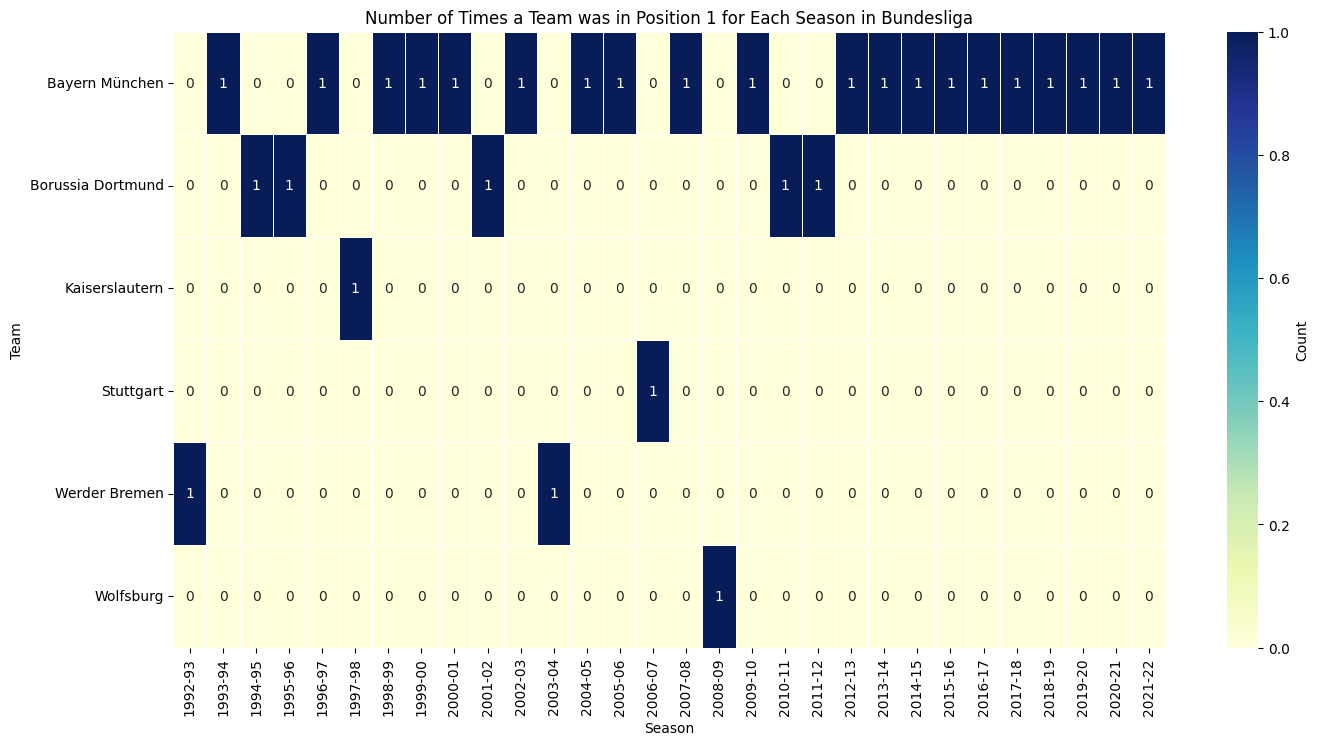

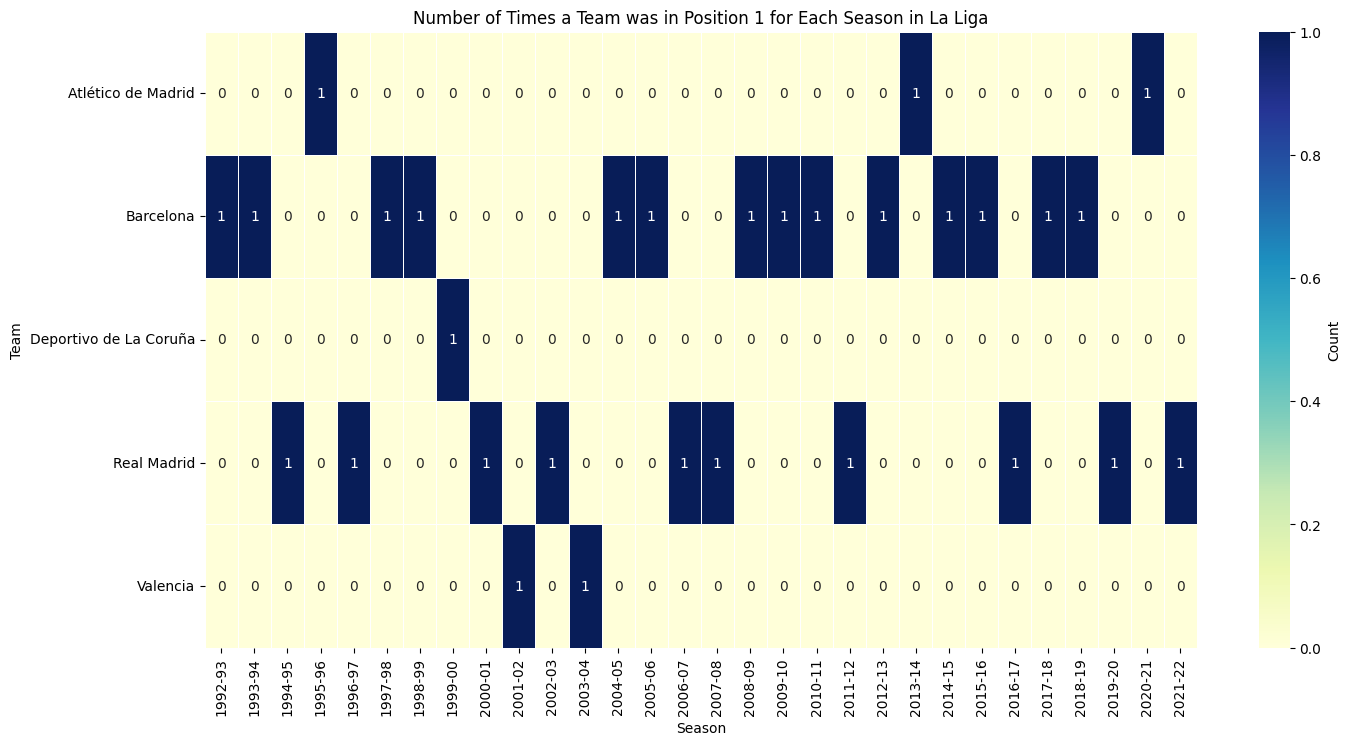

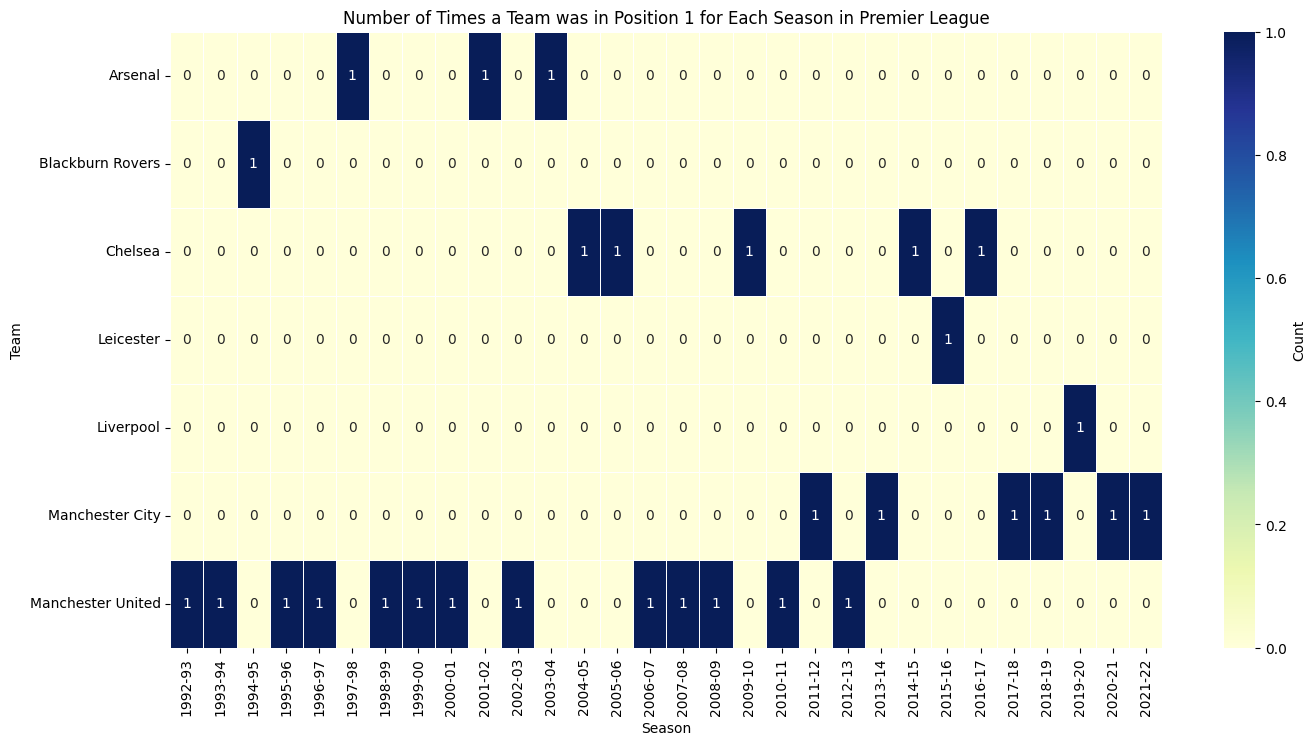

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to only include rows where the 'Position' is 1
position_1_df = combined_df[combined_df['Position'] == 1]

# Create a nested dictionary to store the count of teams in position 1 for each season in their respective leagues
league_season_team_count = {}

for _, row in position_1_df.iterrows():
    league = row['League']
    season = row['Season']
    team = row['Team']
    
    if league not in league_season_team_count:
        league_season_team_count[league] = {}
    
    if season not in league_season_team_count[league]:
        league_season_team_count[league][season] = {}
    
    if team not in league_season_team_count[league][season]:
        league_season_team_count[league][season][team] = 1
    else:
        league_season_team_count[league][season][team] += 1

# Create a DataFrame for each league and plot the heatmap
for league, season_team_count in league_season_team_count.items():
    matrix_data = []

    for season, team_count in season_team_count.items():
        for team, count in team_count.items():
            matrix_data.append((team, season, count))

    league_df = pd.DataFrame(matrix_data, columns=['Team', 'Season', 'Count'])
    matrix_df = league_df.pivot(index='Team', columns='Season', values='Count').fillna(0)
    
    plt.figure(figsize=(16, 8))
    sns.heatmap(matrix_df, annot=True, cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Count'})
    plt.title(f"Number of Times a Team was in Position 1 for Each Season in {league}")
    plt.xlabel("Season")
    plt.ylabel("Team")
    plt.show()

So, that's interesting.

We can notice that considering 30 years of data, we have 6 different winners in the Bundesliga, 7 different winners in the Premier League and, in La Liga we have 5 different winners.<p>

Considering the different winners, we can say that Premier League is the most competitive one and La Liga is the less competitive.<p>

But, even though we have more winners in the Bundesliga than La Liga, we can see quite a domain from one specific team: Bayern Munchen. So in 30 years, Bayern won 20 times, that's huge, and we can see also that in the last 10 years, Bayern has been winning the championship title (just to say, they are in the first place while I am doing that study and, to be honest, probably they will win it again).<p>

Let's do less texting and more visualization...

In [32]:
import pandas as pd
from IPython.display import display, HTML

# Filter the dataframe to only include rows where the 'Position' is between 1 and 4
positions_1_to_4_df = combined_df[combined_df['Position'].isin(range(1, 5))]

# Group the filtered dataframe by 'League', 'Team', and 'Position', then count the occurrences
grouped_df = positions_1_to_4_df.groupby(['League', 'Team', 'Position']).size().reset_index(name='Count')

# Pivot the grouped dataframe to create a table with the desired structure
pivot_df = grouped_df.pivot_table(index=['League', 'Team'], columns='Position', values='Count', fill_value=0).reset_index()

# Create a new column 'Team-League' by combining the 'Team' and 'League' columns
pivot_df['Team-League'] = pivot_df['Team'] + ' - ' + pivot_df['League']

# Rename the columns and set the index to 'Team-League'
pivot_df.columns = ['League', 'Team', '1st Place', '2nd Place', '3rd Place', '4th Place', 'Team-League']
pivot_df = pivot_df.set_index('Team-League')
pivot_df = pivot_df.drop(columns=['League', 'Team'])

# Display the table using the IPython.display library
display(HTML(pivot_df.to_html()))

,1st Place,2nd Place,3rd Place,4th Place
Team-League,,,,
1860 München - Bundesliga,0,0,0,1
Bayer Leverkusen - Bundesliga,0,5,6,5
Bayern München - Bundesliga,20,6,2,1
Borussia Dortmund - Bundesliga,5,6,5,4
Borussia Mönchengladbach - Bundesliga,0,0,1,4
Eintracht Frankfurt - Bundesliga,0,0,1,0
Freiburg - Bundesliga,0,0,1,0
Hamburger - Bundesliga,0,0,2,2
Hannover 96 - Bundesliga,0,0,0,1


In [33]:
# Count the number of different teams that were in positions 1, 2, 3, and 4 for each league
different_teams_in_top_4_by_league = grouped_df.groupby('League')['Team'].nunique()

print("Number of different teams in positions 1, 2, 3, and 4 for each league:")
print(different_teams_in_top_4_by_league)

Number of different teams in positions 1, 2, 3, and 4 for each league:
League
Bundesliga        17
La Liga           16
Premier League    14
Name: Team, dtype: int64


This is quite interesting, right?<p>

So, I created another cutoff, taking a look on the classification between the 1st and 4th position (which can grant a classification for Uefa Champions League).<p>

We can see, again, Bundesliga with more different teams running around that classification zone, than the other leagues. However, looking at the numbers we can't say that this happens because the league is competitive or because the teams can stand for a long as competitive teams.<p>

There are a lot of different teams but most of the cases they are there for just one season. We can see that looking at that the other leagues doesn't seem so competitive as well. Let's try to confirm that.

In [34]:
# Create a new DataFrame with the desired columns
new_pivot_df = pivot_df.copy()
new_pivot_df['Among 4th'] = new_pivot_df['1st Place'] + new_pivot_df['2nd Place'] + new_pivot_df['3rd Place'] + new_pivot_df['4th Place']
new_pivot_df = new_pivot_df[['1st Place', 'Among 4th']]

# Display the new DataFrame
display(HTML(new_pivot_df.to_html()))


,1st Place,Among 4th
Team-League,,
1860 München - Bundesliga,0,1
Bayer Leverkusen - Bundesliga,0,16
Bayern München - Bundesliga,20,29
Borussia Dortmund - Bundesliga,5,20
Borussia Mönchengladbach - Bundesliga,0,5
Eintracht Frankfurt - Bundesliga,0,1
Freiburg - Bundesliga,0,1
Hamburger - Bundesliga,0,4
Hannover 96 - Bundesliga,0,1


Ok, let's create a cutoff. Let's say that in 30 years, we would consider the team a competitive one, if that team was at least 5 times in the first 4 positions.<p>

We also wants to discover if the league itself is a competitive one, so we must think about the whole picture here. So, if there are a lot of different teams running around the first positions, might be because it's a competitive league, a good way to think about that would be to look for the results of the other teams that were there in the first 4 positions. If there we have the same teams there running around, it seems that probably you have a competitive league but a weak competitive league.<p>

In [35]:
# Filter the DataFrame to only include teams that were among the top 4 positions at least 5 times
filtered_pivot_df = new_pivot_df[new_pivot_df['Among 4th'] >= 5]

# Display the filtered DataFrame
display(HTML(filtered_pivot_df.to_html()))

,1st Place,Among 4th
Team-League,,
Bayer Leverkusen - Bundesliga,0,16
Bayern München - Bundesliga,20,29
Borussia Dortmund - Bundesliga,5,20
Borussia Mönchengladbach - Bundesliga,0,5
RB Leipzig - Bundesliga,0,5
Schalke 04 - Bundesliga,0,11
Stuttgart - Bundesliga,1,6
Werder Bremen - Bundesliga,2,8
Atlético de Madrid - La Liga,3,13


In [37]:
# Add a 'Team-League' column to the 'grouped_df' DataFrame
grouped_df['Team-League'] = grouped_df['Team'] + ' - ' + grouped_df['League']

# Get the list of teams that were among the top 4 positions at least 5 times
filtered_teams = filtered_pivot_df.index.tolist()

# Filter the 'grouped_df' DataFrame to only include rows with teams from the 'filtered_teams' list
filtered_grouped_df = grouped_df[grouped_df['Team-League'].isin(filtered_teams)]

# Count the number of different teams that were in positions 1, 2, 3, and 4 for each league
different_teams_in_top_4_by_league_filtered = filtered_grouped_df.groupby('League')['Team'].nunique()

print("Number of different teams in positions 1, 2, 3, and 4 for each league (filtered):")
print(different_teams_in_top_4_by_league_filtered)

Number of different teams in positions 1, 2, 3, and 4 for each league (filtered):
League
Bundesliga        8
La Liga           6
Premier League    7
Name: Team, dtype: int64


We still got more teams in Bundesliga than the other ones. And again, La Liga  is the League with less teams running around the first 4 positions.<p>

So far as we know, Premier league is the league with more winners across the last 30 years but Bundesliga is the League with more different teams running around the first 4 positions.<p>

But there's an interesting fact either.
We can see less that from the 8 teams on Bundesliga, 4 were in the first 4 positions more than 10 times in the past 30 years, and Bayern was there 29 times (that's a lot).<p>

In La Liga, we have 4 from the 6 teams in the first 4 positions at least 10 times and we have 2 teams with a huge presence there: Barcelona (29 times and 14 titles) and Real Madrid (28 times and 10 titles), such a domain, right?.<p>

In Premier League we can see 5 different teams from 7 in the first 4 positions at least 10 times in the past 30 years. That's more balanced, although we have Manchester United with 25 appearances, we have greater balance on this league..

I also think that a great way to see if we have a competitive league is to take a look at the team's performance. So, even if you have a team winning the majority of times, if the amount of points is not so far from the others, it seems that this might be balanced.<p>

Also it's good to take a look of the averages as well, we can have a team that is in a bad shape during the season but if we go to the average we can also know if we have a team that is way better than the others and a balanced league as well.

So let's take a look on that.

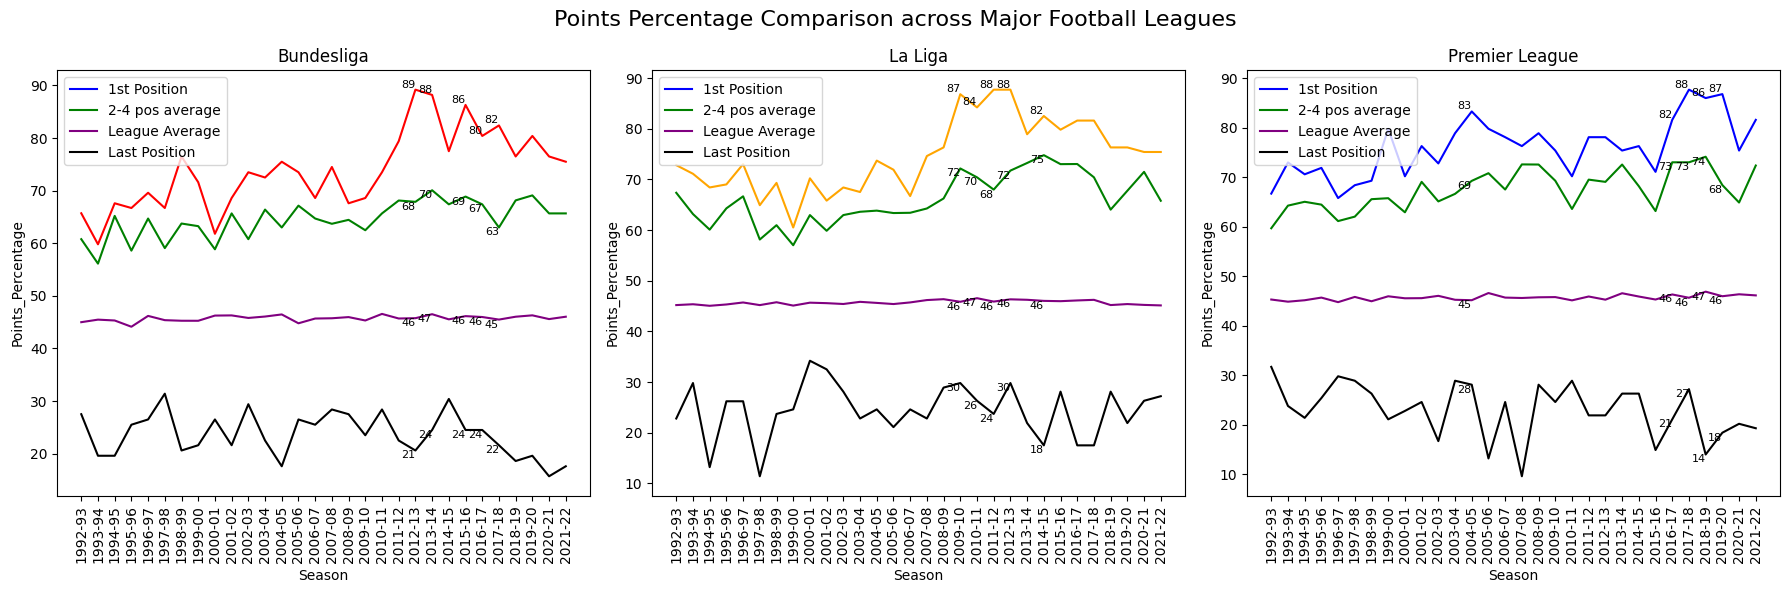

In [78]:
import numpy as np
from adjustText import adjust_text


# Create subplots for each league
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)

colors = {
    "Bundesliga": "red",
    "Premier League": "blue",
    "La Liga": "orange",
}

line_colors = {
    "top_4_average": "green",
    "league_average": "purple",
    "last_position": "black",
}

for ax, league in zip(axes, combined_df['League'].unique()):
    # Points_Percentage of the 1st position
    first_position_filtered = first_position[first_position['League'] == league].copy()
    first_position_filtered.sort_values(by='Season', inplace=True)
    ax.plot(first_position_filtered['Season'], first_position_filtered['Points_Percentage'],
            label=f"1st Position", color=colors[league])

    # Average Points_Percentage
    avg_points_percentage_filtered = average_points_percentage[average_points_percentage['League'] == league].copy()
    avg_points_percentage_filtered.sort_values(by='Season', inplace=True)
    ax.plot(avg_points_percentage_filtered['Season'], avg_points_percentage_filtered['Points_Percentage'],
            label=f"League Average", color=line_colors['league_average'])

    # Points_Percentage of the first 4 positions
    first_4_positions_filtered = first_4_positions[first_4_positions['League'] == league]
    points_percentage_first_4 = first_4_positions_filtered.groupby('Season')['Points_Percentage'].mean().reset_index()
    points_percentage_first_4.sort_values(by='Season', inplace=True)
    ax.plot(points_percentage_first_4['Season'], points_percentage_first_4['Points_Percentage'],
            label=f"2-4 pos average", color=line_colors['top_4_average'])

    # Points_Percentage of the last position
    last_position_filtered = last_position[last_position['League'] == league].copy()
    last_position_filtered.sort_values(by='Season', inplace=True)
    ax.plot(last_position_filtered['Season'], last_position_filtered['Points_Percentage'],
            label=f"Last Position", color=line_colors['last_position'])
    
    texts=[]

    # Add labels for all datapoints in the top 5 seasons with the highest Points_Percentage for the 1st position team
    for idx, row in first_position_filtered.nlargest(5, 'Points_Percentage').iterrows():
        season = row['Season']
        ax.text(season, row['Points_Percentage'], f"{row['Points_Percentage']:.0f}", fontsize=8, ha='right', va='bottom')

        top_4_avg = points_percentage_first_4.loc[points_percentage_first_4['Season'] == season, 'Points_Percentage'].values[0]
        ax.text(season, top_4_avg, f"{top_4_avg:.0f}", fontsize=8, ha='right', va='top')

        league_avg = avg_points_percentage_filtered.loc[avg_points_percentage_filtered['Season'] == season, 'Points_Percentage'].values[0]
        ax.text(season, league_avg, f"{league_avg:.0f}", fontsize=8, ha='right', va='top')

        last_pos = last_position_filtered.loc[last_position_filtered['Season'] == season, 'Points_Percentage'].values[0]
        ax.text(season, last_pos, f"{last_pos:.0f}", fontsize=8, ha='right', va='top')

    # Format the chart
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    ax.set_title(league)
    ax.set_xlabel("Season")
    ax.set_ylabel("Points_Percentage")

# Add the legend and display the chart
legend_order = ["1st Position", "2-4 pos average", "League Average", "Last Position"]
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ordered_handles = [by_label[label] for label in legend_order]

for ax, league in zip(axes, leagues):
    ax.legend([by_label[label] for label in legend_order], legend_order, loc='upper left')
fig.suptitle("Points Percentage Comparison across Major Football Leagues", fontsize=16)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/1.DataScience_Analytics/Footbal_DataSets/leagues_overview.png')
plt.show()

## **4. Image**
**You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality, beauty, and insightfulness.**<p>

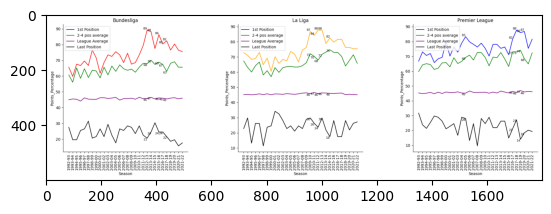

In [73]:
import matplotlib.pyplot as plt

# Load the saved image
img = plt.imread('/content/drive/MyDrive/1.DataScience_Analytics/Footbal_DataSets/leagues_overview.png')

# Display the image
plt.imshow(img)
plt.show()

## **5. Discussion**
**You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.**

Ok. So it's difficult to summary everything in one chart. I did some extra exploring and analysis before the plot that I am showing. So far as we know, Premier league is the league with more different winners (7) across the last 30 years. However Bundesliga is the League with more different teams running around the first 4 positions, when we filter our data to consider only teams that were in the first 4 positions at least 5 times across 30 years, at Premier League we can see 7 teams, which 5 of them at least 10 times in the past 30 years in the first 4 positions, while in Bundesliga we can only see 4 from 8 in the same conditions. Even when we look at the teams with more appearances int the top 4 positions, at Bundesliga we can see Bayern 29 times while in the Premier League Manchester is there 25 times. Both teams are teams with more titles, however, Bayern has 20 titles agains 13 from Manchester.<p>

I tried to take a look at the team's performance on each season to try to define a pattern but however everything points to Premier League in that preliminary analysis, when we look at the teams' performance to try to find the discrepancies, we can see that all three leagues has a very balanced perfomance. The average points for the 1st position, for the UCL classification area and, for the last position are pretty similar. We can also see that the average points earned in each league are pretty much the same. So, the conclusion is that regarding the team's performance, all three leagues are very balanced but when it comes to different champions and different teams with chances to become a champion, Premiere League is indeed the more competitive league compared with Bundesliga and La Liga.